# **AP155 Lab Assignment**
## Module 4: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Darwin P. Manalo Jr. \
_Student No._: 2022-10113\
_Section_: THV-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: November 3, 2024

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Darwin P. Manalo Jr.**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/50
* Problem 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(25 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$.

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(25 pts.)*

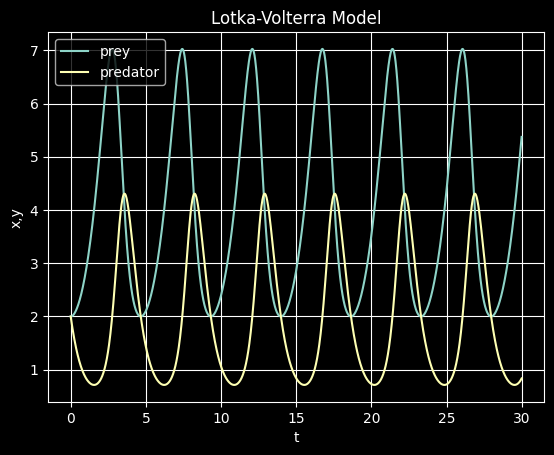

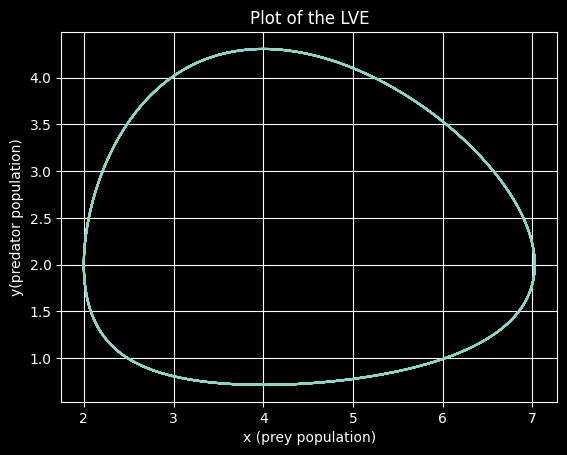

In [ ]:

from numpy import arange, array # import functions from numpy for numeral and array operations
import matplotlib.pyplot as plt # importing the library for plotting the data and results
# Initial conditions given the following parameters
alpha = 1.0 # represents the growth rate of the prey
beta = 0.5 # represents the predation rate (how fast the predators consume their prey)
gamma = 0.5 # represents the growth rate of predators depending on the population of the prey
delta = 2.0 # represents the mortality rate of predators

def f(r,t): # Letting the function composed of 'r' as a vector composing of x and y components and 't' as the time
  x = r[0] # x is the population of prey
  y = r[1] # y is the population of predators
  f_x = alpha*x-beta*x*y # rate of change for prey based on the Lotka-Volterra equations
  f_y = gamma*x*y - delta*y # rate of change for predators according to the Lotka-Volterra equations
  return array([f_x,f_y], float)
# Setting the initial conditions and integration
a = 0.0 # a as the starting point of the time interval
b = 30.0 # b as the ending point of the time interval
n = 2000 # n is the number of time steps
h = (b-a)/n # h as the time step size
tpoints = arange(a,b,h) # array of time values from a to b with increments of h
xpoints = [] # this will store the population of prey at each time step
ypoints = [] # this will store the population of predator at each time step
r = array([2.0,2.0], float) # array representing the initial populations of prey and predators which are both set to 2.0
# Integrating the given differential equation using RK-4 method
for t in tpoints: # This loop iterates through each time point to calculate the populations
  xpoints.append(r[0]) # appends the current population while going over the loop to xpoints
  ypoints.append(r[1]) # appends the current population while going over the loop to ypoints
  r1 = f(r,t) # r1-r4 are the intermediate slopes calculated using Runge-Kutta method
  r2 = f(r + 0.5*h*r1, t + 0.5*h)
  r3 = f(r + 0.5*h*r2, t + 0.5*h)
  r4 = f(r + h*r3, t + h)
  r = r + (h/6.0)*(r1 + 2.0*r2 + 2.0*r3 + r4) # new state computed by combining these slopes
# Plotting both the x and y as a function of time on the same axes from t=0 to t=30
plt.plot(tpoints,xpoints) # this creates the plot for the populations of prey over time
plt.plot(tpoints,ypoints) # this creates the plot for the population of predators over time
plt.xlabel('t') # sets the label for the x-axis
plt.ylabel('x,y') # sets the label for the y-axis
plt.title("Lotka-Volterra Model") # creates a title for the plot
plt.legend(['prey', 'predator']) # creates a legend for different colors of the plot
plt.style.use('dark_background') # calls for a dark backround for better illustation
plt.grid() # creates a grid for better visualization
plt.show() # calls for the display of the plot
print("") # creates a space between the two plots
plt.plot(xpoints, ypoints) # This second plot visualzes the dynamics in phase space showing the relationship between the prey and predator populations
plt.xlabel("x (prey population)") # sets the label for the x-axis
plt.ylabel("y(predator population)") # sets the label for the y-axis
plt.title("Plot of the LVE") # creates the title of the plot
plt.grid() # creates a grid for better visualization
plt.show() # calls for the display of the plot

1. From the Lotka-Volterra model, we have $\frac{dx}{dt}=x(\alpha - \beta y)$ and $\frac{dy}{dt}=y(\gamma x -\delta)$\\
Solving the Lotka-Volterra equations
\begin{equation}
\frac{dx}{dy} = \frac{x(\alpha - \beta y)}{y(\gamma x -\delta)}
\end{equation}
\begin{equation}
\begin{split}
\int \frac{(\gamma x - \delta)dx}{x} &=\int \frac{(\alpha - \beta y)dy}{y}\\
\gamma x - \delta ln|x| - \alpha ln|y| + \beta y &= 0
\end{split}
\end{equation}
Now, let's discuss the parameters $\alpha$, $\beta$, $\gamma$, and $\delta$.\
The $\alpha$ parameter represents the growth rate of the prey population, rabbits, in the absence of predators so the higher this parameter the more faster the prey can reproduce since the number of predators, foxes, are low which results population growth of the rabbits. On the other hand, when the values of the parameter $\alpha$ is too low, the rabbits will struggle to survive leading to the decline of the population.\
The $\beta$ parameter is the coefficient of the predation rate that measures how fast the predators (foxes) consume their prey (rabbits) and it is proportional to the population of both predators and prey. A larger $\beta$ indicates that there are more foxes increasing the predation rate which leads to greater mortality of the rabbits and when it is too high, it could lead to the rapid decline of the rabbits which then later cause starvation for the foxes.\
The $\gamma$ parameter represents the growth rate of the foxes population which is dependent on the availability of the rabbits so a higher $\gamma$ means foxes can reproduce more quickly due to sufficient supply of food (rabbits) which creates a biological chain where more prey leads to more predators. While a low value of $\gamma$ means that the predator population may not grow enough to keep up with the availability of the prey resulting to a lower population levels or maybe a potential extinction.\
The $\delta$ parameter indicates the natural mortality rate of the predator population in the absence of the prey so a larger $\delta$ implies that the predators die at a faster rate since they do not have sufficient prey to consume leading to population decline and if it is too high, it runs the risk of extinction especially when the prey population also declines due to high $\beta$ (predation rates).\
In conclusion, the values of these parameters dictate how quickly these populations grow and decline so understanding these parameters help in analyzing the dynamics of predator-prey relationships in ecosystems. Thus, adjusting the values of these parameters may help in achieving ecological stability especially the impact of human activities on wildlife populations.

2. The graphs of this Lotka-Volterra Equation describes the dynamics of the population. Let's start with the population of both rabbits and foxes which exhibits periodic oscillations that means the populations rise and fall in response to each other e.g. when the rabbit population increases, it provides more food for the foxes leading to an increase in the population of foxes which decreases the rabbit population due to increased predation. Next, let's interpret the graph more extensively. The peaks and troughs of the two populations are out of phase as shown in the first plot where the rabbit population reached it peak first before the fox population which represents the time it takes for the foxes to respond to the abundance of rabbits. This time lag is necessary to understand the relationship between rabbits and foxes. However, over time, the populations tend to stabilize around certain values but they still continue to oscillate indicating a dynamic equilibrium so if either of the population becomes too low or too high, the other population will also change accordingly demonstrating the interrelation of the two species. Lastly, these results can be observed in real ecosystems and understanding these concepts enable ecologists to predict population changes and manage wildlife conservation which highlights the delicate balance in the ecosystems so any events disrupting this balance may cause an extinction of one or both species. In summary, the plots of Lotka-Volterra model demonstrates the cylical nature of predator-prey relationships which follows the concept of ecological dynamics.


### PROBLEM 2

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(25 pts.)*

2. Make a graph of $\theta$ as a function of time. *(25 pts.)*


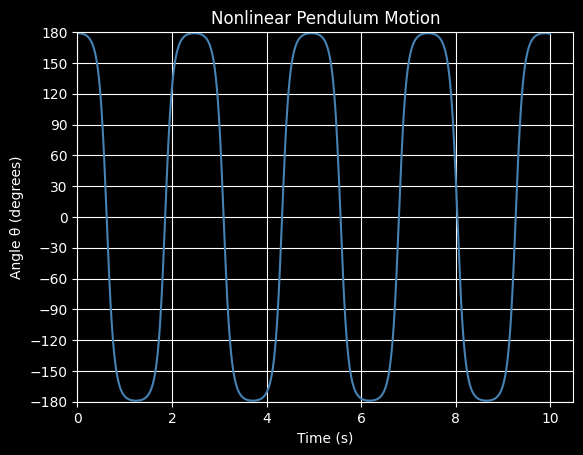

In [ ]:
import numpy as np # importing the numpy and labeling it as np
from numpy import arange, array, sin, rad2deg  # importing the necessary operations like arrays, trigonometric, and radians to degree operations
import matplotlib.pyplot as plt # importing the library for plotting the data and results
# Constants
g = 9.81 # acceleration due to gravity (m/s^2)
l = 0.1 # length of the pendulum
O = 0 # index for theta (angular position) in the state vector r
omega = 1 # index for angular velocity in the state vector r
# Defining the function for the differential equation of the pendulum
def f(r,t): # this calculates the derivatives of the state variables
 theta = r[O] # angular position
 omega = r[1] # angular velocity
 ftheta = omega # derivative of theta which is omega
 fomega = -(g/l)*sin(theta) # derived from the equation of motion for pendulum where the right-hand side of the equation represents the acceleration due to gravity
 return array([ftheta,fomega] ,float) # return an array with both rates of change
# Time Parameters
a = 0.0 # starting time of the interval
b = 10 # ending time of the interval
n = 1000 # time steps
h = (b-a)/n # Time step size
tpoints = arange(a,b,h) # array of time values
thetapoints = [] # stores the angular position at each time step
omegapoints = [] # stores the angular velocity at each time step
r = array([np.radians(179.0),0.0], float)  # array representing the initial angle (converted to radians) and initial angular velocity (0.0).
# Iterates at each time point
for t in tpoints:
  thetapoints.append(r[O]) # current values of theta are stored
  omegapoints.append(r[1]) # current values of omega are stored
  # Runge-Kutte 4th-order method
  r1 = f(r,t)
  r2 = f(r + 0.5*h*r1, t + 0.5*h)
  r3 = f(r + 0.5*h*r2, t + 0.5*h)
  r4 = f(r + h*r3, t + h)
  r = r + (h/6.0)*(r1 + 2.0*r2 + 2.0*r3 + r4) # combining the slopes
# Plotting
plt.plot(tpoints,rad2deg(thetapoints), 'steelblue') # This plot shows the angular position (in degrees) of the pendulum over time
plt.xlabel('Time (s)')
plt.ylabel('Angle θ (degrees)')
plt.grid()
plt.ylim(-180, 180) # these limits are set to show the full range of motion from (-180 to 180 degrees)
plt.xlim(0) # x-axis starts from 0
plt.yticks([180, 150, 120, 90, 60, 30, 0, -30, -60, -90, -120, -150, -180]) # Specific y-ticks are set for clarity
plt.title("Nonlinear Pendulum Motion")
plt.show()

1. This code simulates the dynamics of a nonlinear pendulum and visualizes its angular position over time. It utilizes the Runge-Kutta method for numerical integration, providing an accurate representation of the pendulum's behavior. The choice of initial conditions and parameters allows for exploration of the pendulum's motion over multiple periods. Based on the results, the pendulum exhibits periodic oscillatory motion as expected since it is a characteristic of pendulum systems and agrees to theoretical understanding that a pendulum will swing back and forth. We also note that the given initial condition which is at what angle the swing starts, which is 179 degrees, leads to initial potential energy converts to kinetic energy as the pendulum swings down exhibiting the conservation of energy. Moreover, the pendulum's dynamics are nonlinear especially at larger angles so at 179 degrees, the motion is influenced by the sine function which diverges from linear behavior which results in a decrease of frequency of the oscillation as the amplitude increases. However, these results show idealized behavior of the system which does not include damping which is most likely to happen in real-life causing an energy loss and decreasing the amplitude over time. We can also take note of the choice of a small time step (0.01 seconds) that ensures stability and accuracy in numerical simulation. In conclusion, these results confirm the theoretical predictions about the motion of a pendulum but also highlighted the significance of initial conditions and the role of nonlinear dynamics.

2. After analyzing the graph of the pendulum's angle $\theta$ (in degrees) over time, let's interpret the results based on the given plot and highlight the difference between the ideal model and real-life model. First, the graph shows a sinusoidal behavior indicating that the pendulum undergoes a periodic oscillation and the amplitude remains constant reflecting the conservation of energy. It is shown in the graph that as the pendulum swings, the transformation between potential and kinetic energy is observable in the graph e.g. at the peaks where the angle is the highest, the kinetic energy is at minimum (velocity = 0). Conversely, at the lowest point where the angle is at 0 degrees, the kinetic energy is at its maximum. Now, since we start at 179 degrees, the dynamics at larger angles introduce a nonlinear relationship affecting the speed and period of oscillation. These results were for an ideal system where the amplitude is constant but in real-world, there is damping considerations like air resistance and friction causing the amplitude to decrease over time which results to energy loss which eventually will cause the pendulum to stop swinging thus the energy is not conserved since some energy is transformed into thermal energy or sound.